In [1]:
from data import colorize_image as CI
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Choose gpu to run the model on
gpu_id = 0

# Initialize colorization class
colorModel = CI.ColorizeImageTorch(Xd=256)

# Load the model
colorModel.prep_net(gpu_id,
                    './models/pytorch/caffemodel.pth')

# Load the image
colorModel.load_image('./test_imgs/mortar_pestle.jpg')

def put_point(input_ab,mask,loc,p,val):
    # input_ab    2x256x256    current user ab input (will be updated)
    # mask        1x256x256    binary mask of current user input (will be updated)
    # loc         2 tuple      (h,w) of where to put the user input
    # p           scalar       half-patch size
    # val         2 tuple      (a,b) value of user input
    input_ab[:,loc[0]-p:loc[0]+p+1,loc[1]-p:loc[1]+p+1] = np.array(val)[:,np.newaxis,np.newaxis]
    mask[:,loc[0]-p:loc[0]+p+1,loc[1]-p:loc[1]+p+1] = 1
    return (input_ab,mask)

mask = np.zeros((1,256,256)) # giving no user points, so mask is all 0's
input_ab = np.zeros((2,256,256)) # ab values of user points, default to 0 for no input

# initialize with no user inputs
input_ab = np.zeros((2,256,256))
mask = np.zeros((1,256,256))

ColorizeImageTorch instantiated
path = ./models/pytorch/caffemodel.pth
Model set! dist mode?  False


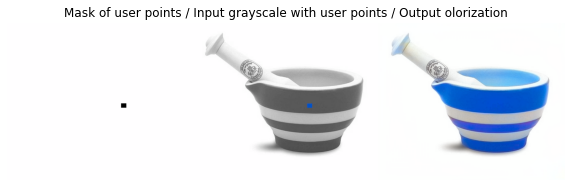

In [5]:
# add a blue point in the middle of the image
(input_ab,mask) = put_point(input_ab,mask,[135,160],3,[23,-69])

# call forward
img_out = colorModel.net_forward(input_ab,mask)

# get mask, input image, and result in full resolution
mask_fullres = colorModel.get_img_mask_fullres() # get input mask in full res
img_in_fullres = colorModel.get_input_img_fullres() # get input image in full res
img_out_fullres = colorModel.get_img_fullres() # get image at full resolution

# show user input, along with output
plt.figure(figsize=(10,6))
plt.imshow(np.concatenate((mask_fullres,img_in_fullres,img_out_fullres),axis=1));
plt.title('Mask of user points / Input grayscale with user points / Output olorization')
plt.axis('off');
plt.show()

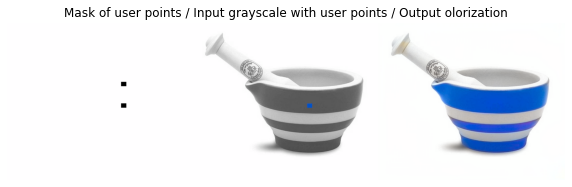

In [6]:
# add a blue point in the middle of the image
(input_ab,mask) = put_point(input_ab,mask,[100,160],3,[0,0])

# call forward
img_out = colorModel.net_forward(input_ab,mask)

# get mask, input image, and result in full resolution
mask_fullres = colorModel.get_img_mask_fullres() # get input mask in full res
img_in_fullres = colorModel.get_input_img_fullres() # get input image in full res
img_out_fullres = colorModel.get_img_fullres() # get image at full resolution

# show user input, along with output
plt.figure(figsize=(10,6))
plt.imshow(np.concatenate((mask_fullres,img_in_fullres,img_out_fullres),axis=1));
plt.title('Mask of user points / Input grayscale with user points / Output olorization')
plt.axis('off');
plt.show()